In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read the csv

In [12]:
df = pd.read_json('10k_verified.json')
df

date                                               text  fluct
65906   2021-04-07  Bitcoin price crash: Cryptocurrency plunges in...      0
66378   2021-04-07  The #BTC is stuck inside a large range between...      0
66447   2021-04-07  Price data of #Bitcoin #BTC pairs on #btcturkp...      0
67137   2021-04-07  #WhatsApp rival #Signal reportedly testing pee...      0
67248   2021-04-07  When supply is more than demand, what happens?...      0
...            ...                                                ...    ...
1884552 2021-11-25  In this video I'll show you some of my huge #B...      1
1884928 2021-11-25           up only #Bitcoin https://t.co/HxCx1l71Pe      1
1885069 2021-11-25  With Web3, I think we will see many more anony...      1
1885235 2021-11-25  #Bitcoin once again is a risk asset and no hav...      1
1885301 2021-11-25  Will #Solana overtake #Ethereum in market cap?...      1

[10783 rows x 3 columns]

Perform oversampling to balance the dataset

In [13]:
def perform_oversampling(df):
    '''
    Performs oversampling on dataframe to make classification distribution equal. Returns a new dataframe.
    '''
    df_high = df[df['fluct'] == 1]
    df_low = df[df['fluct'] == 0]
    df_low_oversampled = df_low.sample(df_high.shape[0], replace=True)
    return pd.concat([df_low_oversampled, df_high], axis=0)

print('Original data:')
print(df['fluct'].value_counts())

df_balanced = perform_oversampling(df)

print('-'*10)
print('After oversampling:')
print(df_balanced['fluct'].value_counts())

Original data:
1    5513
0    5270
Name: fluct, dtype: int64
----------
After oversampling:
0    5513
1    5513
Name: fluct, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_balanced,stratify=df_balanced['fluct'], test_size=0.2, random_state=25)
training_data['fluct'].value_counts()

0    4410
1    4410
Name: fluct, dtype: int64

In [15]:
y = training_data['fluct']
X = training_data['text']

y_test = testing_data['fluct']
X_test = testing_data['text']

In [20]:
# Use Chi squared to select all the best features
from sklearn.feature_selection import chi2
y = training_data['fluct']
X = training_data['text']


tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [21]:
chi_scores = chi2(tfidf_train,y)

In [22]:
chi_scores

(array([0.40821003, 0.25322898, 0.25696   , ..., 0.35652962, 0.35652962,
        0.35652962]),
 array([0.52287942, 0.61481057, 0.61221641, ..., 0.55043994, 0.55043994,
        0.55043994]))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(X_test)

Naive-Bayes

In [9]:
mnb = MultinomialNB() 
mnb.fit(tfidf_train, y)
pred = mnb.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')

confusion_matrix(y_test,pred, labels=['0','1'])

Accuracy: 72.3%


array([[0, 0],
       [0, 0]], dtype=int64)

## SVC with GridSearchCV

In [10]:
from sklearn import svm
from sklearn.svm import SVC

clf = SVC()
clf.fit(tfidf_train, y)

SVC()

In [11]:
from sklearn import metrics

y_pred = clf.predict(tfidf_train)
print("Training Accuracy:", metrics.accuracy_score(y, y_pred))

Training Accuracy: 0.9841269841269841


In [12]:
y_pred = clf.predict(tfidf_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.7769718948322756


In [13]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(tfidf_train, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   7.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   7.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   7.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   7.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   7.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.510 total time=   7.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   7.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.517 total time=   7.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   7.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.510 total time=   7.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.511 total time=   7.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
# best parameter after tuning
print(grid.best_params_)
 
# model after tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


## k-fold with 10 iterations

[CV 1/10] END .......C=100, gamma=1, kernel=rbf;, score=0.760 total time=   6.9s
[CV 2/10] END .......C=100, gamma=1, kernel=rbf;, score=0.737 total time=   7.3s
[CV 3/10] END .......C=100, gamma=1, kernel=rbf;, score=0.753 total time=   8.0s
[CV 4/10] END .......C=100, gamma=1, kernel=rbf;, score=0.762 total time=   6.6s
[CV 5/10] END .......C=100, gamma=1, kernel=rbf;, score=0.722 total time=   6.6s
[CV 6/10] END .......C=100, gamma=1, kernel=rbf;, score=0.749 total time=   6.5s
[CV 7/10] END .......C=100, gamma=1, kernel=rbf;, score=0.757 total time=   6.5s
[CV 8/10] END .......C=100, gamma=1, kernel=rbf;, score=0.727 total time=   6.5s
[CV 9/10] END .......C=100, gamma=1, kernel=rbf;, score=0.779 total time=   6.6s
[CV 10/10] END ......C=100, gamma=1, kernel=rbf;, score=0.778 total time=   6.5s

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(tfidf_train, y)

In [15]:
clf = SVC(C=100, gamma=1, kernel='rbf')
clf.fit(tfidf_train, y)

SVC(C=100, gamma=1)

In [16]:
y_pred = clf.predict(tfidf_train)
print("Training Accuracy:", metrics.accuracy_score(y, y_pred))

Training Accuracy: 0.9996598639455783


In [17]:
y_pred = clf.predict(tfidf_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.7824116047144152


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
y_prediction = clf.predict(tfidf_test).flatten()
y_prediction

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

Text(33.0, 0.5, 'Truth')

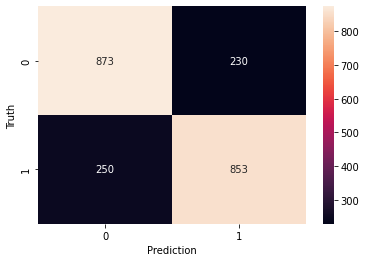

In [21]:
cm = confusion_matrix(y_test, y_prediction)
cm

sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [22]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1103
           1       0.79      0.77      0.78      1103

    accuracy                           0.78      2206
   macro avg       0.78      0.78      0.78      2206
weighted avg       0.78      0.78      0.78      2206



In [8]:
# Creating train-test Split
from sklearn.model_selection import train_test_split
X = df[['text']]
y = df[['fluct']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

vec = CountVectorizer()
clf = LogisticRegression()
pipe = make_pipeline(vec, clf)
pipe.fit(X_train.text, y_train.fluct)

K:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [10]:
clf.classes_

array([0, 1], dtype=int64)

In [11]:
import eli5
feature_imp = eli5.show_weights(clf, vec=vec, top=100)
feature_imp

K:\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
df = pd.read_csv('top_words.csv')
df.head()

weight             word
0   1.867  openingceremony
1   1.766     olympicgames
2   1.762       bwordevent
3   1.534              bde
4   1.521             bito

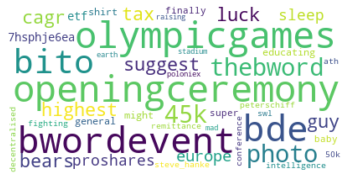

In [13]:
from wordcloud import WordCloud
#Creating the text variable
text = " ".join(cat for cat in df.word)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

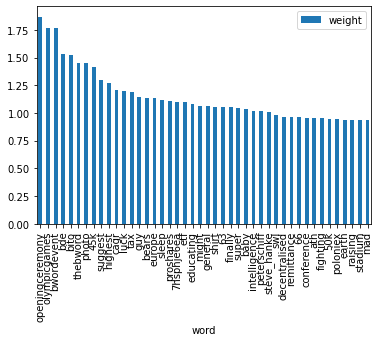

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
   
df.plot(x = 'word', y='weight', kind = 'bar')
plt.show()

In [45]:
df = pd.read_csv('least_impact.csv')
df.head()

weight    words
0  -0.914      ban
1  -0.914     citi
2  -0.919      bet
3  -0.923  massive
4  -0.927  barrier

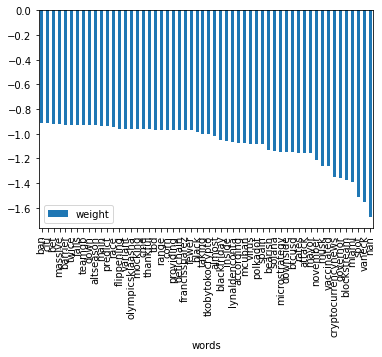

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
   
df.plot(x = 'words', y='weight', kind = 'bar')
plt.show()

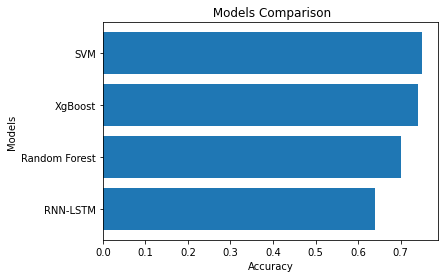

In [52]:
import matplotlib.pyplot as plt
 
x=['RNN-LSTM','Random Forest', 'XgBoost', 'SVM']
 
y=[0.64, 0.70, 0.74, 0.75]
plt.barh(x, y)

plt.xlabel("Accuracy")
plt.ylabel("Models")  
plt.title(" Models Comparison")
plt.show()

## RNN -LSTM Model

In [23]:
y = training_data['fluct']
X = training_data['text']

y_test = testing_data['fluct']
X_test = testing_data['text']
tf.convert_to_tensor(X)

<tf.Tensor: shape=(8820,), dtype=string, numpy=
array([b'The Progressive Health Forum says there is no evidence yet suggesting that COVID-19 vaccines are the direct cause of some fatalities. #covidvaccine\nhttps://t.co/LD4QKrR2Nw',
       b'These 5 apps let you buy, sell and trade Bitcoin in India\n\n#Bitcoin #Crypto #cryptocurrencies #BGRIndia \n\nhttps://t.co/QgEEIxMO5s',
       b'#crypto #bitcoin $TSLA $DOGE $PAC https://t.co/LdiNWOcFXe', ...,
       b'@Marketsbylili @compass_mining We would love to have you on our podcast sometime to talk about #bitcoin and @compass_mining!! https://t.co/cU8VFpaIEX',
       b'Environment Remittances is the a TOP TOPIC for everyone! \n\nRemittances: Once you start trying to send fiat and you see the ease plus cost savings of using crypto, you\xe2\x80\x99ll truly understand why it\xe2\x80\x99s the big topic. #cryptotrading #BWordEvent #Bitcoin @jack @elonmusk https://t.co/pyYEg2Exs1',
       b"#COVIDVaccine registration is open for people aged 25-29.

In [24]:
BATCH_SIZE = 32
train_ds = tf.data.Dataset.from_tensor_slices((X, y))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# train_ds, val_ds, test_ds = get_dataset_partitions_tf(datatext, shuffle=True)       # Split into train, val, and test datasets

# train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [25]:
VOCAB_SIZE = 768

encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [26]:
def model_create():
    model1=Sequential()
    model1.add(encoder)
    model1.add(tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))

    model1.add(LSTM(32,return_sequences=False))
    model1.add(Dropout(0.2))

    # model.add(LSTM(32,return_sequences=False))
    # model.add(Dropout(0.2))

    model1.add(Dense(32,activation='relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(1,activation='sigmoid'))
    
    return model1

In [28]:
model1 = model_create()

In [30]:
model1.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [31]:
history = model1.fit(train_ds, validation_data=test_ds, epochs=20)

Epoch 1/20
276/276 [==============================] - 10s 25ms/step - loss: 0.6717 - accuracy: 0.5622 - val_loss: 0.6290 - val_accuracy: 0.6306
Epoch 2/20
276/276 [==============================] - 6s 21ms/step - loss: 0.6239 - accuracy: 0.6344 - val_loss: 0.6283 - val_accuracy: 0.6369
Epoch 3/20
276/276 [==============================] - 6s 22ms/step - loss: 0.6001 - accuracy: 0.6600 - val_loss: 0.6424 - val_accuracy: 0.6419
Epoch 4/20
276/276 [==============================] - 6s 22ms/step - loss: 0.5717 - accuracy: 0.6851 - val_loss: 0.6468 - val_accuracy: 0.6392
Epoch 5/20
276/276 [==============================] - 6s 21ms/step - loss: 0.5405 - accuracy: 0.7105 - val_loss: 0.6657 - val_accuracy: 0.6523
Epoch 6/20
276/276 [==============================] - 6s 21ms/step - loss: 0.5170 - accuracy: 0.7268 - val_loss: 0.7336 - val_accuracy: 0.6596
Epoch 7/20
276/276 [==============================] - 6s 21ms/step - loss: 0.4907 - accuracy: 0.7423 - val_loss: 0.7430 - val_accuracy: 0.663

Best Accuracy for RNN model

Training : 66.00 %
Testing : 64.19 %

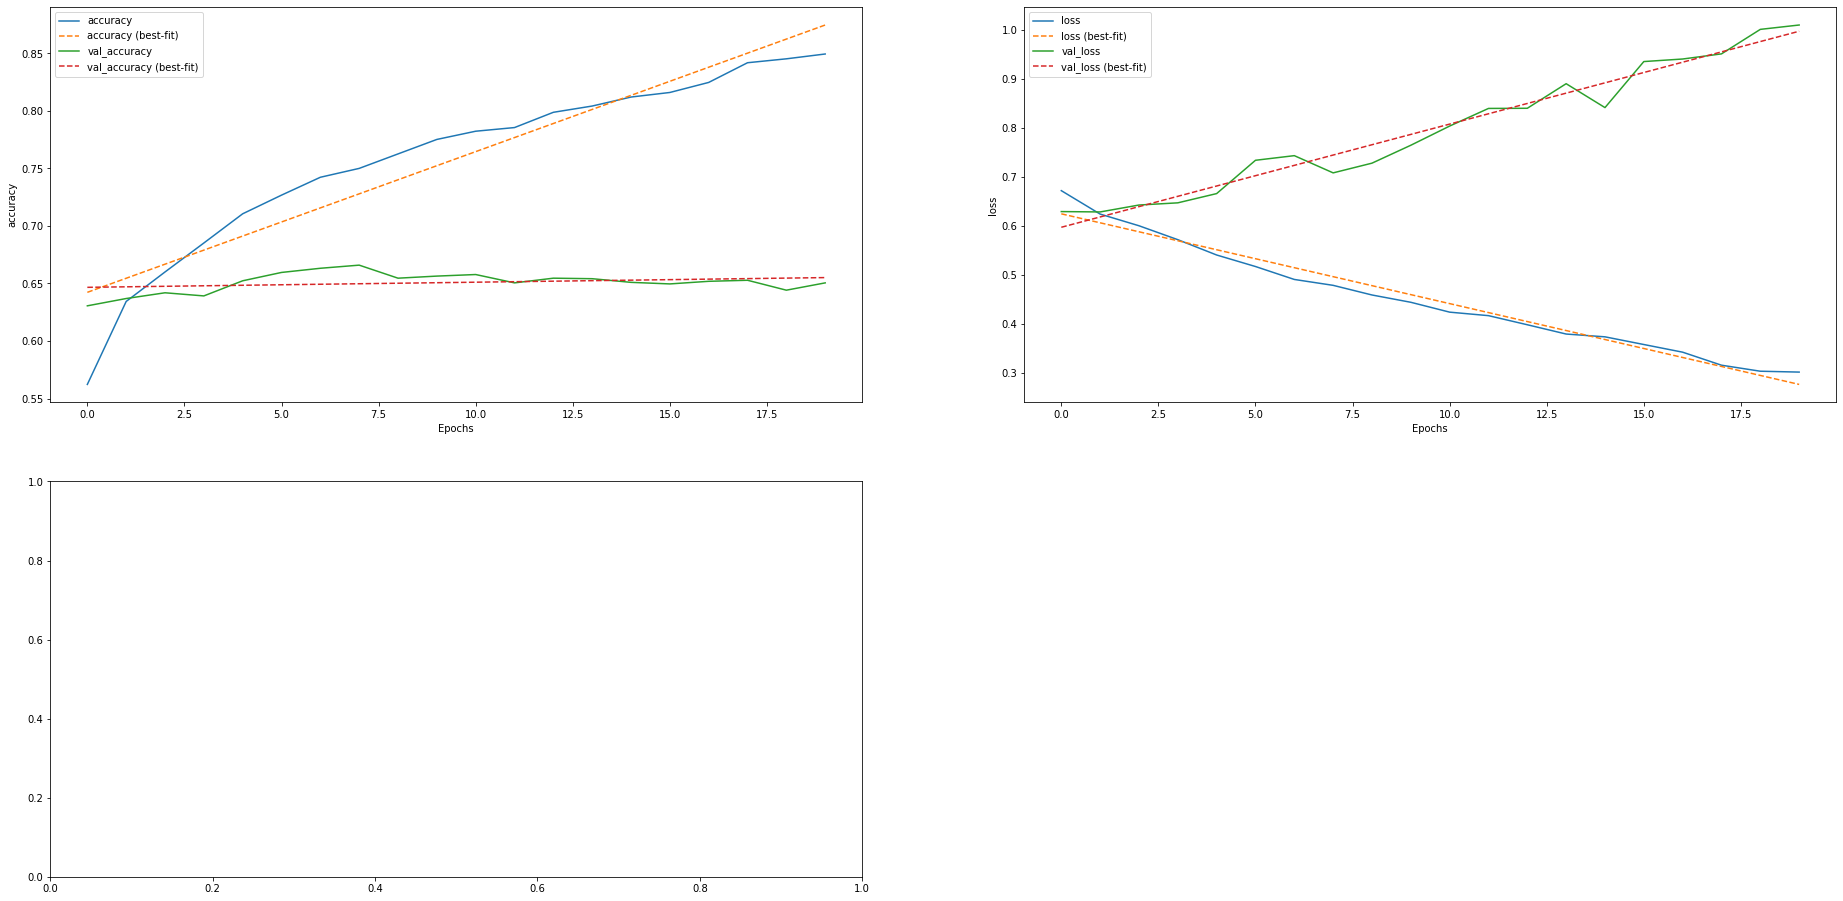

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    y = history.history[metric]
    y_val = history.history['val_'+metric]
    x = [i for i in range(len(y))]

    plt.plot(y)
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y, 1))(x)), '--')
    plt.plot(y_val, '')
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y_val, 1))(x)), '--')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'{metric} (best-fit)', 'val_'+metric, f'val_{metric} (best-fit)'])

plt.figure(figsize=(32, 16))
plt.subplot(2, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(2, 2, 2)
plot_graphs(history, 'loss')
plt.subplot(2, 2, 3)

plt.savefig("final.png")

In [36]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_balanced, stratify=df_balanced['fluct'], test_size=0.2, random_state=25)

x_train = train_data['text']
y_train = train_data['fluct']

x_test = test_data['text']
y_test = test_data['fluct']

In [37]:
print('train shape:', tfidf_train.shape)
print('test shape:', tfidf_test.shape)

train shape: (8820, 22554)
test shape: (2206, 22554)


In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(
    eval_metric='auc',
    subsample = 1,
    n_estimators=300,
    max_depth=500,
    colsample_bytree=0.5,
    learning_rate=0.1
)

In [38]:
eval_set = [(tfidf_train, y_train), (tfidf_test, y_test)]

model.fit(
    tfidf_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=eval_set,
    verbose=True
)

[0]	validation_0-auc:0.90724	validation_1-auc:0.70391


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-auc:0.94608	validation_1-auc:0.74550
[2]	validation_0-auc:0.95989	validation_1-auc:0.75570
[3]	validation_0-auc:0.96785	validation_1-auc:0.76366
[4]	validation_0-auc:0.97378	validation_1-auc:0.77189
[5]	validation_0-auc:0.97839	validation_1-auc:0.78064
[6]	validation_0-auc:0.98093	validation_1-auc:0.78357
[7]	validation_0-auc:0.98317	validation_1-auc:0.78445
[8]	validation_0-auc:0.98509	validation_1-auc:0.78597
[9]	validation_0-auc:0.98669	validation_1-auc:0.79033
[10]	validation_0-auc:0.98762	validation_1-auc:0.79240
[11]	validation_0-auc:0.98878	validation_1-auc:0.79603
[12]	validation_0-auc:0.98970	validation_1-auc:0.79761
[13]	validation_0-auc:0.99065	validation_1-auc:0.79976
[14]	validation_0-auc:0.99169	validation_1-auc:0.80272
[15]	validation_0-auc:0.99224	validation_1-auc:0.80505
[16]	validation_0-auc:0.99269	validation_1-auc:0.80611
[17]	validation_0-auc:0.99333	validation_1-auc:0.80682
[18]	validation_0-auc:0.99406	validation_1-auc:0.80818
[19]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=500,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [39]:
y_true = np.array(y_test.tolist())
y_pred = model.predict_proba(tfidf_test)[:,1]
y_pred = np.where(y_pred > 0.5, 1, 0)   # Change values into 1s or 0s

y_pred

array([0, 0, 0, ..., 0, 1, 1])

Text(33.0, 0.5, 'Truth')

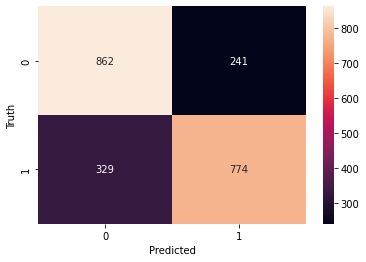

In [40]:
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1103
           1       0.76      0.70      0.73      1103

    accuracy                           0.74      2206
   macro avg       0.74      0.74      0.74      2206
weighted avg       0.74      0.74      0.74      2206



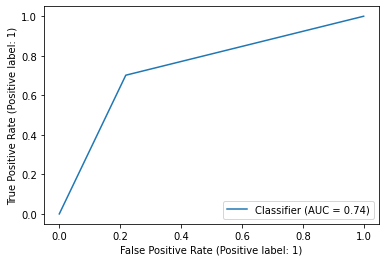

In [42]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_true, y_pred)